# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [170]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [171]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

<Axes: xlabel='fraud'>

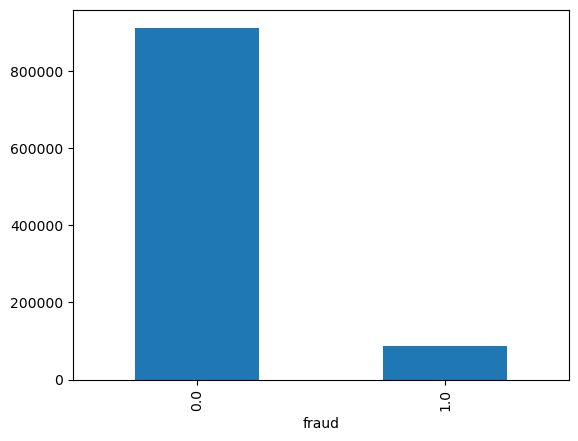

In [172]:
# 1. What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

fraud_or_not = fraud["fraud"].value_counts()
fraud_or_not.plot(kind="bar")

In [173]:
# 2. Train a LogisticRegression.

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

features = fraud.drop("fraud", axis=1)
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [174]:
lr.score(X_test_scaled, y_test)

0.959028

In [175]:
# 3. Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
from sklearn.metrics import classification_report

y_predict = lr.predict(X_test_scaled)

report = classification_report(y_test, y_predict)

print(report)           # Detecta muy bien los no fraudes, pero se equivoca más al detectar un fraude. (El 98% de las veces que no había fraude la predicción lo acertó, pero cuando sí lo habia, solo acertó el 72%)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228421
         1.0       0.89      0.60      0.72     21579

    accuracy                           0.96    250000
   macro avg       0.93      0.79      0.85    250000
weighted avg       0.96      0.96      0.96    250000



In [176]:
# 4. Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model?
from sklearn.utils import resample

not_fraud = fraud[fraud["fraud"] == 0]
is_fraud = fraud[fraud["fraud"] == 1]

yes_diabetes_oversampled = resample(is_fraud, 
                                    replace=True, 
                                    n_samples = len(not_fraud),
                                    random_state=0)

In [177]:
fraud_df_balanced = pd.concat([not_fraud, yes_diabetes_oversampled])

In [178]:
X_train_balanced = fraud_df_balanced.drop(columns="fraud")
y_train_balanced = fraud_df_balanced["fraud"]

lr_over = LogisticRegression(max_iter=1000, random_state=42)
lr_over.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000, random_state=42)

In [179]:
y_predict_balanced = lr_over.predict(X_test_scaled)

print(classification_report(y_test, y_predict_balanced) )
 

c:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93    228421
         1.0       0.35      0.58      0.43     21579

    accuracy                           0.87    250000
   macro avg       0.65      0.74      0.68    250000
weighted avg       0.91      0.87      0.88    250000



In [180]:
# 5. Now, run **Undersample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model?
from imblearn.under_sampling import RandomUnderSampler

# Aplicar undersampling
X = fraud.drop(columns=['fraud'])
y = fraud['fraud']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)



In [181]:
lr_under = LogisticRegression(max_iter=1000, random_state=42)
lr_under.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [182]:
pred = lr_under.predict(X_test_scaled)

print(classification_report(y_pred = pred, y_true = y_test))

c:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93    228421
         1.0       0.35      0.58      0.44     21579

    accuracy                           0.87    250000
   macro avg       0.65      0.74      0.68    250000
weighted avg       0.91      0.87      0.89    250000



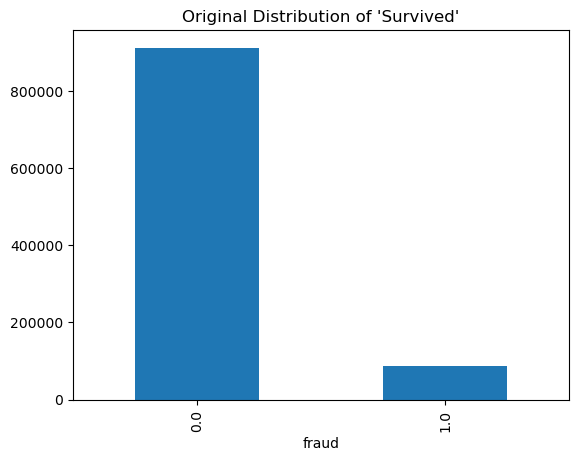

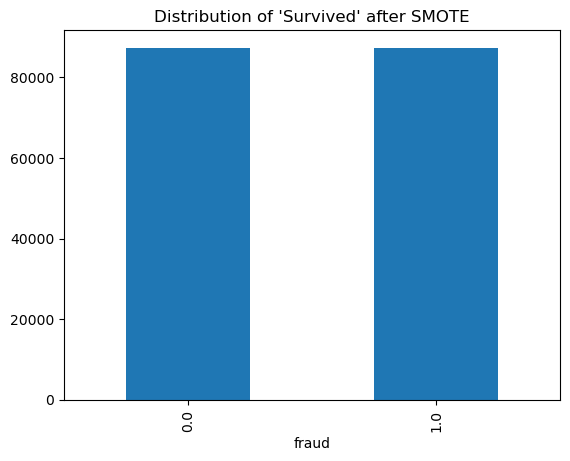

In [183]:
# 6. Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Check the distribution of the 'Survived' column
survived = fraud["fraud"].value_counts()
survived.plot(kind="bar")
plt.title("Original Distribution of 'Survived'")
plt.show()

# Separate features and target variable
X_smote = fraud.drop(columns=["fraud"])
y_smote = fraud["fraud"]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

# Check the new distribution of the target variable
y_resampled.value_counts().plot(kind="bar")
plt.title("Distribution of 'Survived' after SMOTE")
plt.show()

# Save the balanced data
titanic_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [184]:
lr_smote = LogisticRegression(max_iter=1000, random_state=42)
lr_smote.fit(X_resampled_smote, y_resampled_smote)
pred = lr_smote.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

c:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85    228421
         1.0       0.22      0.75      0.34     21579

    accuracy                           0.75    250000
   macro avg       0.60      0.75      0.59    250000
weighted avg       0.91      0.75      0.80    250000

